# Project 2
## Modeling

In [194]:
#read in imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load the Data

In [5]:
#change the name of the df from 'Train' in data cleaning to 'ames' so as not to be confused when splitting the data
ames = pd.read_csv('datasets/clean.csv')
ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,533352170,60,RL,75.0,13517,0,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,531379050,60,RL,43.0,11492,0,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,535304180,20,RL,68.0,7922,0,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,916386060,60,RL,73.0,9802,0,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,906425045,50,RL,82.0,14235,0,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Add the additonal columns to the df that were created in the feature engineering section of EDA

In [8]:
#convert 'SalePrice', '1st Flr SF', 'Gr Liv Area', 'Mas Vnr Area' to logarithmic
ames['log_SalePrice'] = np.log(ames['SalePrice'])
ames['log_1st Flr SF'] = np.log(ames['1st Flr SF'])
ames['log_Gr Liv Area'] = np.log(ames['Gr Liv Area'])

In [9]:
#Create dummy columns for 'Kitchen Qual' and 'Bsmt Qual'
ames = pd.get_dummies(ames, columns = ['Kitchen Qual'], drop_first=True)
ames = pd.get_dummies(ames, columns = ['Bsmt Qual'], drop_first=True)

In [10]:
#ensure df is in proper format
ames.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,log_SalePrice,log_1st Flr SF,log_Gr Liv Area,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA
0,533352170,60,RL,75.0,13517,0,IR1,Lvl,AllPub,CulDSac,...,11.779129,6.586172,7.299121,0,1,0,0,0,0,1
1,531379050,60,RL,43.0,11492,0,IR1,Lvl,AllPub,CulDSac,...,12.301383,6.816736,7.660114,0,1,0,0,1,0,0
2,535304180,20,RL,68.0,7922,0,Reg,Lvl,AllPub,Inside,...,11.599103,6.963190,6.963190,0,1,0,0,0,0,1


## Create Features and Target

Using the discoveries made in the EDA notebook use the optimized feature list below.

In [11]:
predictors = ['Overall Qual',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1',
 'Open Porch SF',
 'Lot Frontage',
 'Wood Deck SF',
 'Lot Area',
 'Bsmt Full Bath',
 'Half Bath',
 'Garage Yr Blt',
 '2nd Flr SF',
 'Bsmt Unf SF',
 'Bedroom AbvGr',
 'Screen Porch',
 '3Ssn Porch',
 'Mo Sold',
 'Pool Area',
 'BsmtFin SF 2',
 'Misc Val',
 'Yr Sold',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 'MS SubClass',
 'Overall Cond',
 'Kitchen AbvGr',
 'Alley',
 'Enclosed Porch',
 'PID',
 'log_1st Flr SF',
 'log_Gr Liv Area',
 'Kitchen Qual_Fa',
 'Kitchen Qual_Gd',
 'Kitchen Qual_TA',
 'Bsmt Qual_Fa',
 'Bsmt Qual_Gd',
 'Bsmt Qual_Po',
 'Bsmt Qual_TA']

In [142]:
# set X to the predictors
X = ames[predictors]
y = ames['log_SalePrice']

## Train/Test Split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

## Scale Data
<br> 
**Scaled Data will be denoted with the suffix _sc**

In [149]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train) #learn the means and stds for each of the features
X_train_sc = ss.transform(X_train) # turned X_train into z-scores
X_test_sc = ss.transform(X_test) # turned X_test into z-scores

# Linear Regression

In [150]:
#instatiate model
model = LinearRegression()

#fit model
model.fit(X_train,y_train) #use scaled X_train_sc here for scaled data

#generate predictions
y_predict = model.predict(X_train) #use scaled X_train_sc here for scaled data
y_predict_test = model.predict(X_test) #use scaled X_test_sc here for scaled data

In [151]:
# analyze metrics
print(f'Cross Validation Avg Score: {cross_val_score(model, X_train, y_train, cv=5).mean()}')
print(f'Training data R^2 Score: {model.score(X_train, y_train)}')
print(f'Testing data R^2 Score: {model.score(X_test, y_test)}')

Cross Validation Avg Score: 0.8927953327347721
Training data R^2 Score: 0.9045315128363336
Testing data R^2 Score: 0.9021020719184097


In [152]:
#convert training prices back to standard form for scoring
y_train = np.exp(y_train)
y_test = np.exp(y_test)
y_predict = np.exp(y_predict)
y_predict_test = np.exp(y_predict_test)

In [153]:
# analyze prediction metrics RMSE
RMSE_train = np.sqrt(mean_squared_error(y_train,y_predict))
RMSE_test = np.sqrt(mean_squared_error(y_test,y_predict_test))                     
print(f'The RMSE of the predicted training data is {RMSE_train}')
print(f'The RMSE of the predicted testing data is {RMSE_test}')                                                    

The RMSE of the predicted training data is 21219.360485874004
The RMSE of the predicted testing data is 22894.777641928362


## LASSO Regression

**Use Scaled Data "_sc"** 


In [108]:
#import LASSO regression model from sklearn
from sklearn.linear_model import Lasso, LassoCV

In [109]:
# Set up a list of LASSO alphas to check.
# Generates 100 values equally between -5 and 5,
# then converts them to alphas between 10^-5 and 10^5.
alphas_lasso = np.logspace(-5,5,100)

# Cross-validate over our list of lasso alphas.
lasso_cv = LassoCV(
    alphas = alphas_lasso,  #no need to designate score here
    cv = 5)

# Fit model using best lasso alpha!
lasso_cv.fit(X_train_sc, y_train);  #supress output

In [110]:
# Here is the optimal value of alpha
print(f'Optimal value of alpha: {lasso_cv.alpha_}')
print(f'Training data R^2 Score: {lasso_cv.score(X_train_sc, y_train)}')
print(f'Testing data R^2 Score: {lasso_cv.score(X_test_sc, y_test)}')

Optimal value of alpha: 187.3817422860383
Training data R^2 Score: 0.9020879570963212
Testing data R^2 Score: -242976735814.7761


The drastic drop in R^2 score indicates this is not the proper model for this data set.

## Elastic Net Regression

#### Using all numeric columns and dummies, the data is not in logarithmic scale and has not been scaled

### Create Features and Target

In [48]:
# set X to the predictors (all numeric columns)
X_all = ames.select_dtypes(exclude=['object'])
# set y target
y_all = ames['SalePrice']

In [49]:
#drop log values (these will not be considered in this model)
X_all = X_all.drop(columns = ['PID','SalePrice','log_SalePrice', 'log_1st Flr SF', 'log_Gr Liv Area'])
#Ensure changes were made
X_all.head(2)

,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Misc Val,Mo Sold,Yr Sold,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA
0,60,75.0,13517,0,6,8,1976,2005,289.0,533.0,...,0,3,2010,0,1,0,0,0,0,1
1,60,43.0,11492,0,7,5,1996,1997,132.0,637.0,...,0,4,2009,0,1,0,0,1,0,0


In [58]:
#assign new predictors variable for Elastic Regression model only
er_predictors = X_all.columns
X_all = ames[er_predictors]

## Train/Test Split
**Elastic Net data indicated by the suffix _en**

In [59]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_all, y_all, random_state=7)

<br>
Train Elastic net Regression model on all numerical features

In [60]:
#import ElasticNet CV from sklearn
from sklearn.linear_model import ElasticNetCV

In [65]:
# From lecture 4.05
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.01, 1, 100)
# Set up our l1 ratio. 
#enet_ratio = np.linspace(0.01, 1, 100)
enet_ratio = .5
# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas,
                          l1_ratio=enet_ratio, cv=5)
# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_en, y_train_en)
# Generate predictions.
enet_model_preds_train = enet_model.predict(X_train_en)
enet_model_preds_test = enet_model.predict(X_test_en)


/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475838957318.98914, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475218612649.5787, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474593909975.95197, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384756191926.19775, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382192882881.34784, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379475326888.97144, tolerance: 761216603.0030218
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427574900313.63434, tolerance: 748940666.5476592
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425903000890.7004, tolerance: 748940666.5476592
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424177282547.17114, tolerance: 748940666.5476592
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433744439147.6259, tolerance: 756809727.9237628
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432162396246.7573, tolerance: 756809727.9237628
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430539874167.3651, tolerance: 756809727.9237628
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_m

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467539953083.43225, tolerance: 767088162.4715918
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466158580697.40454, tolerance: 767088162.4715918
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464748232338.6116, tolerance: 767088162.4715918
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470227873640.15, tolerance: 781312665.7752466
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469072691376.5144, tolerance: 781312665.7752466
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467896811640.3575, tolerance: 781312665.7752466
  tol, rng, random, positive)
/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

In [66]:
# Here is the optimal value of alpha.
print(f'The optimal alpha for the model: {enet_model.alpha_}')
print(f'The model ratio(manually set): {enet_model.l1_ratio_}')
print(f'Training data R^2 Score: {enet_model.score(X_train_en, y_train_en)}')
print(f'Testing data R^2 Score: {enet_model.score(X_test_en, y_test_en)}')

RMSE_train_er = np.sqrt(mean_squared_error(enet_model_preds_train,y_train_en))
RMSE_test_er = np.sqrt(mean_squared_error(enet_model_preds_test,y_test_en))

print(f'The RMSE of the predicted training data is {RMSE_train_er}')
print(f'The RMSE of the predicted testing data is {RMSE_test_er}')   

The optimal alpha for the model: 0.01
The model ratio(manually set): 0.5
Training data R^2 Score: 0.9053502220599142
Testing data R^2 Score: 0.8986275053685565
The RMSE of the predicted training data is 24244.561083809986
The RMSE of the predicted testing data is 25645.833945574752


## Model Conclusions

Based on the RMSE scores on the testing data, the OLS Linear Regression model will be used for the Kaggle competition as it is performing the best. **OLS RMSE is 22894.7** which is *less than* the **Elastic Net RMSE of 25645.8**

## Load in Kaggle Data and Process Predictions

In [111]:
test_data = pd.read_csv('datasets/test.csv')

In [112]:
#after reeading in the test data add the logarithmic fields
test_data['log_1st Flr SF'] = np.log(test_data['1st Flr SF'])
test_data['log_Gr Liv Area'] = np.log(test_data['Gr Liv Area'])

In [113]:
#add dummies
test_data = pd.get_dummies(test_data, columns = ['Kitchen Qual'], drop_first=True)
test_data = pd.get_dummies(test_data, columns = ['Bsmt Qual'], drop_first=True)

In [114]:
#assign predictors (linear regression version)
test_data_X = test_data[predictors]
test_data_X.isnull().sum().sum()

1026

In [115]:
#remove null values for 'Mas Vnr Area'
test_data_X['Mas Vnr Area'].fillna(0,inplace = True)

#remove null values for 'Garage Yr Built'
test_data_X['Garage Yr Blt'].fillna(0,inplace = True)

#remove null values for 'Lot Frontage'
test_data_X['Lot Frontage'].fillna(0,inplace = True)

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [116]:
# systematically replace 'Alley' values with 0 and any other value with 1
#iterate over the entrie df
for i in range(len(test_data_X)): 
#check to see if 'Alley' is null
    if pd.isnull(test_data_X.loc[i,'Alley']):
#if null replace with 0
        test_data_X.loc[i,'Alley'] = 0
#otherwise replace with 1
    else:
        test_data_X.loc[i,'Alley'] = 1

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Fit Linear Regression Model

In [117]:
test_data_X

,Overall Qual,Total Bsmt SF,Garage Area,Garage Cars,Year Built,Year Remod/Add,Full Bath,Mas Vnr Area,TotRms AbvGrd,Fireplaces,...,PID,log_1st Flr SF,log_Gr Liv Area,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA
0,6,1020,440,1,1910,1950,2,0.0,9,0,...,902301120,6.811244,7.564238,1,0,0,1,0,0,0
1,5,1967,580,2,1977,1977,2,0.0,10,0,...,905108090,7.584265,7.584265,0,0,1,0,1,0,0
2,7,654,426,2,2006,2006,2,0.0,7,1,...,528218130,6.498282,7.310550,0,1,0,0,1,0,0
3,5,968,480,2,1923,2006,1,0.0,5,0,...,902207150,6.875232,6.875232,0,0,1,0,0,0,1
4,6,1394,514,2,1963,1963,1,247.0,6,2,...,535105100,7.239933,7.239933,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,6,1084,488,2,1974,1974,2,0.0,8,1,...,527377110,6.988413,7.537430,0,0,1,0,0,0,1
874,6,1104,480,2,1966,1999,2,410.0,9,1,...,535126140,7.006695,7.594884,0,1,0,0,0,0,1
875,5,952,322,1,1968,1968,1,0.0,5,1,...,904100040,7.099202,7.099202,0,0,1,0,0,0,1
876,4,864,528,2,1971,1971,1,0.0,5,0,...,527425140,6.761573,6.761573,0,0,1,0,0,0,1


In [118]:
lr_test_predict_y = model.predict(test_data_X)

In [120]:
#convert the predictions back into standard form
lr_test_predict_y = np.exp(lr_test_predict_y)

### Create Submission DF

In [121]:
submission = pd.DataFrame()

In [122]:
submission['Id'] = test_data['Id']

In [123]:
submission['SalePrice'] = lr_test_predict_y

In [124]:
submission.head()

,Id,SalePrice
0,2658,136596.107485
1,2718,146576.924585
2,2414,200384.766033
3,1989,109480.767214
4,625,163855.205850


### Export DF as CSV to Submission Folder

In [ ]:
#change the attempt # for each itteration of the model
submission.to_csv('Submissions/attempt12.csv',index=False)

## Model Interpretations for presentation

In [180]:
errors = np.subtract(y_test, y_predict_test)

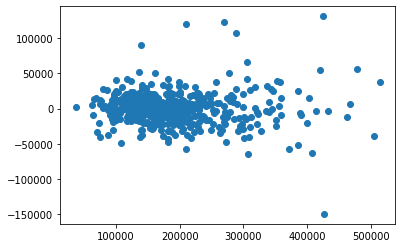

In [198]:
plt.scatter(y_predict_test, errors)

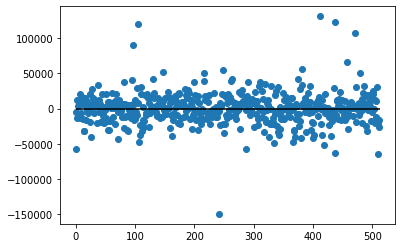

In [193]:
plt.scatter(range(513),errors)
plt.hlines(0,0,513);

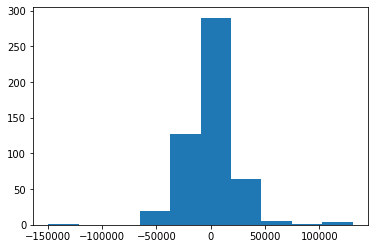

In [192]:
plt.hist(errors);

In [196]:
MAE_train = mean_absolute_error(y_train,y_predict)
MAE_test = mean_absolute_error(y_test,y_predict_test)                     
print(f'The MAE of the predicted training data is {MAE_train}')
print(f'The MAE of the predicted testing data is {MAE_test}')  

The MAE of the predicted training data is 14403.581039708852
The MAE of the predicted testing data is 15608.653188240625


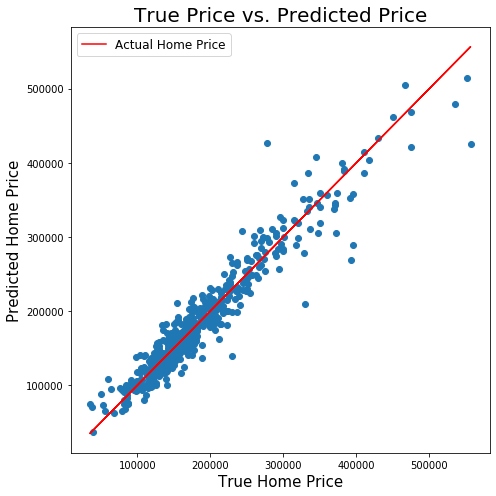

In [246]:
plt.figure(figsize = (7,7))
plt.scatter(y_test,y_predict_test)
actual = plt.plot(y_test,y_test,color = 'red', label='Actual Home Price')
plt.xlabel('True Home Price', size = 15)
plt.ylabel('Predicted Home Price', size=15)
plt.title('True Price vs. Predicted Price', size = 20)
plt.tight_layout()
plt.legend(handles=actual, fontsize='large')

#save this image
plt.savefig('./images/lr_pred_actual.png')

In [247]:
y_train.mean()

180190.09244791666